# Heart Disease Prediction - Project Overview


In [14]:
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [15]:
df = pd.read_csv(r"D:\Real ML\Level 3\Heart Disease\heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


EDA

In [16]:
print("🔍 Shape of dataset:", df.shape)
print("\n📌 Column Names:\n", df.columns.tolist())
print("\n📊 Data Types:\n", df.dtypes)

print("\n📈 Descriptive Statistics:\n", df.describe())

# Check for missing values
print("\n❓ Missing Values:\n", df.isnull().sum())

# Check for duplicates
print("\n📌 Duplicated Rows:", df.duplicated().sum())

# Target variable distribution
print("\n⚖️ Target Distribution:")
print(df['HeartDisease'].value_counts(normalize=True))


🔍 Shape of dataset: (918, 12)

📌 Column Names:
 ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']

📊 Data Types:
 Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

📈 Descriptive Statistics:
               Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     5

Data cleaning


In [17]:
df.drop_duplicates(inplace=True)

# Optional: Strip spaces and standardize categorical strings
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip().str.lower()


EDA VISUALIZATION


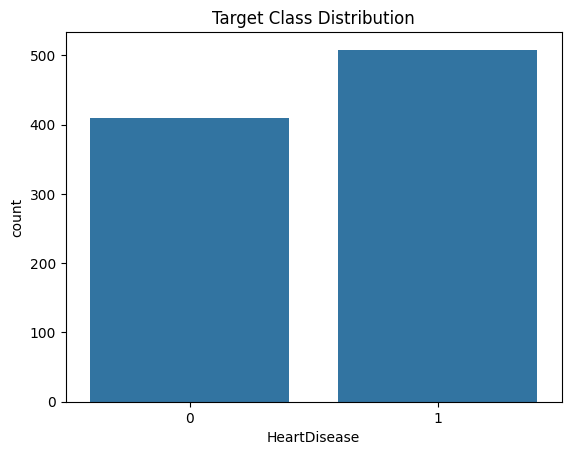

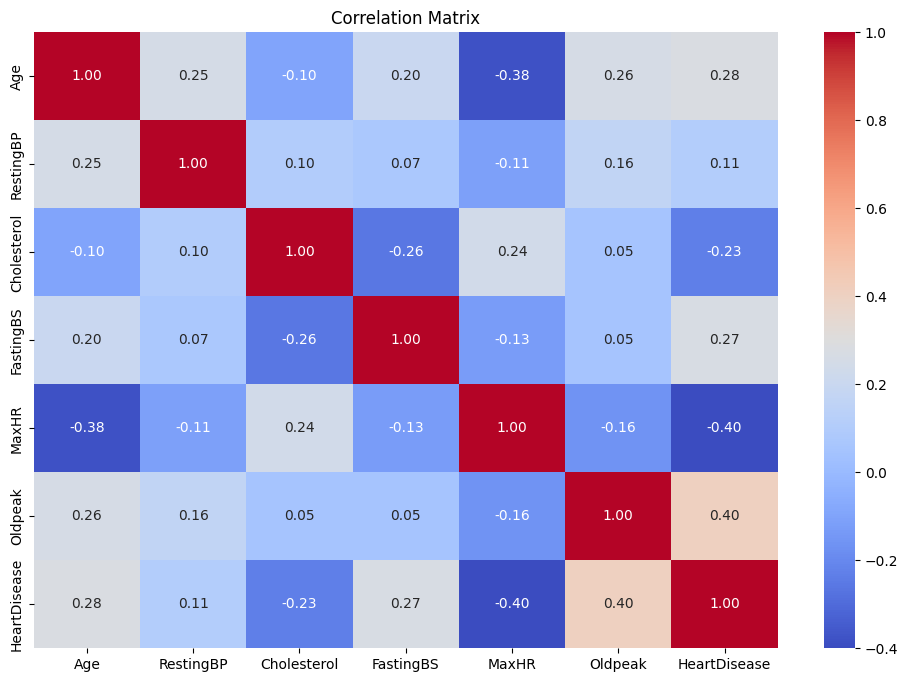

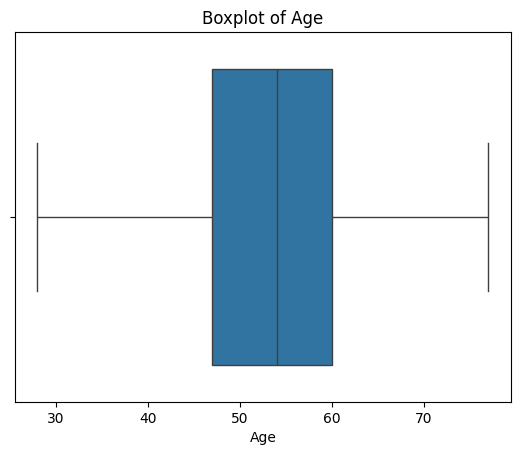

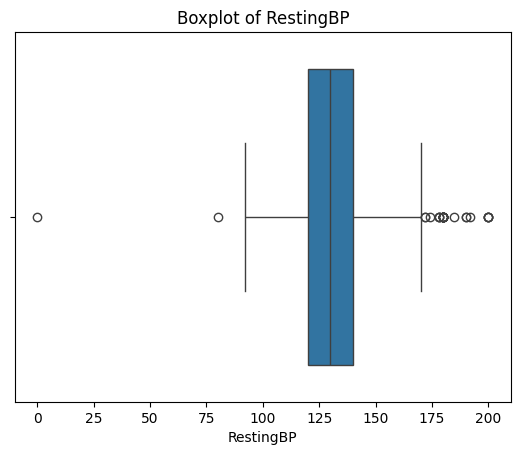

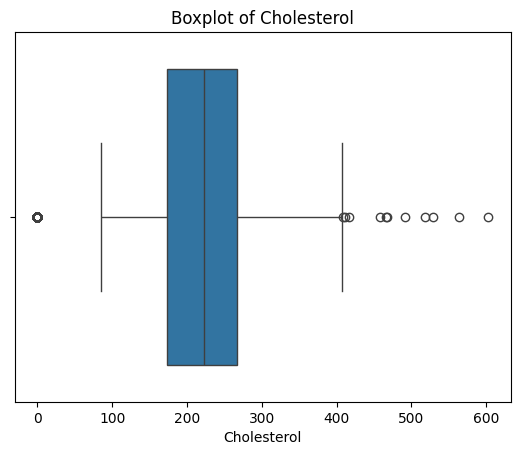

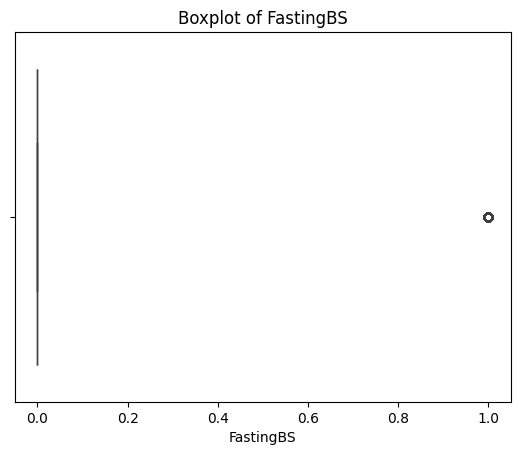

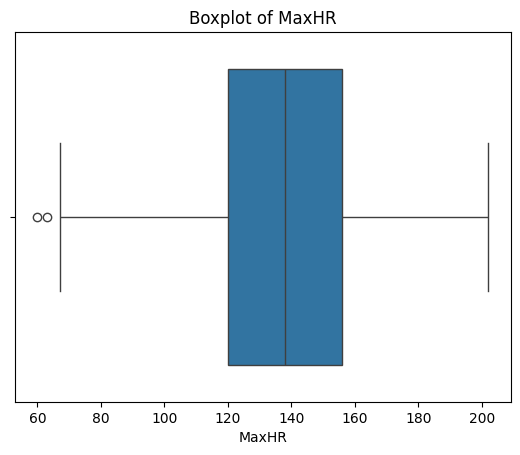

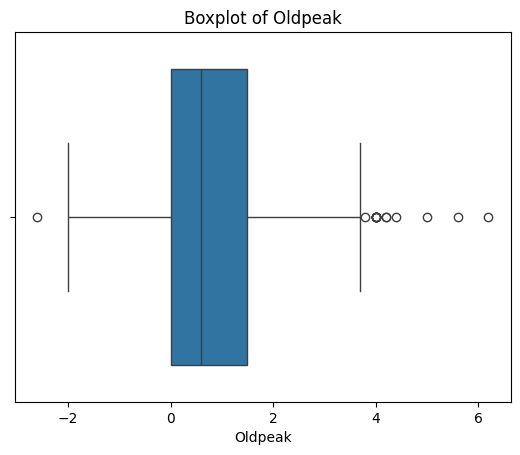

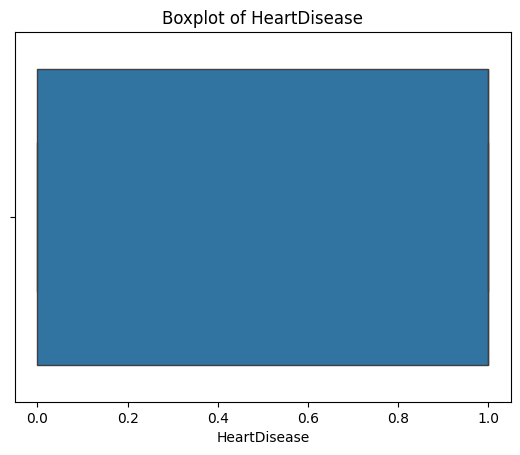

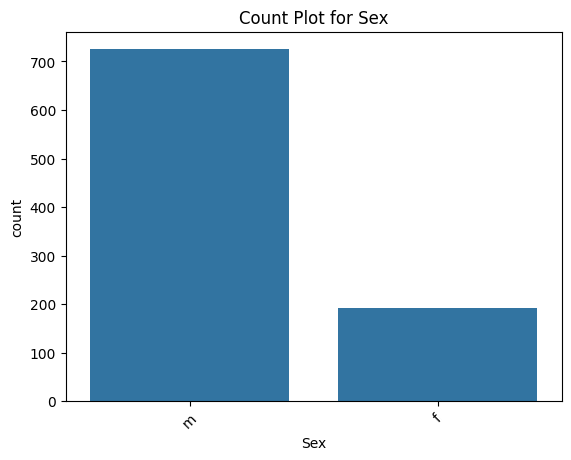

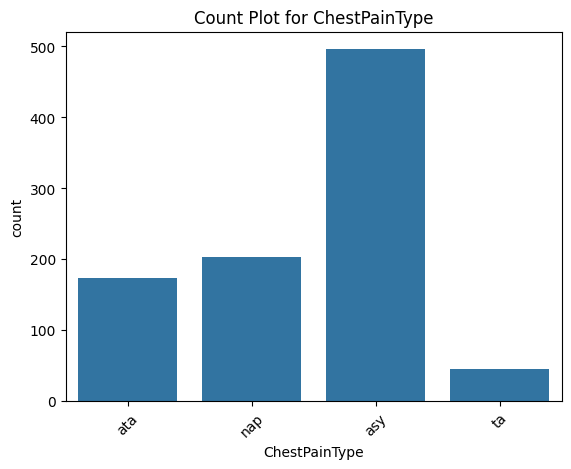

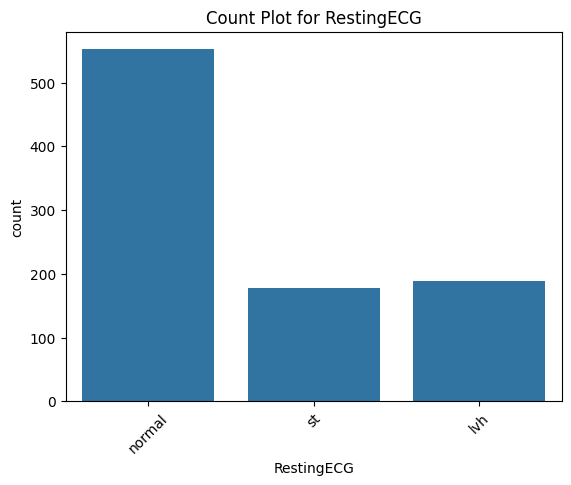

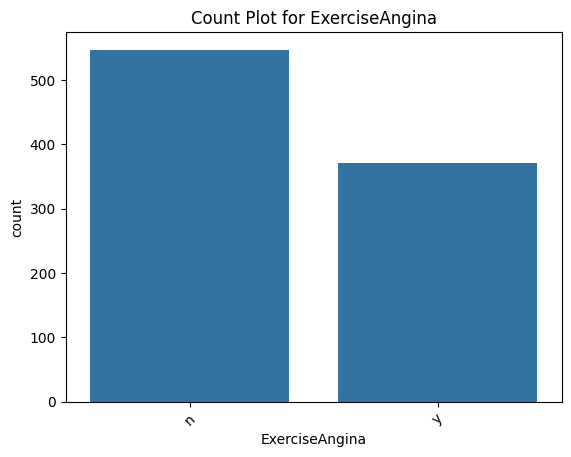

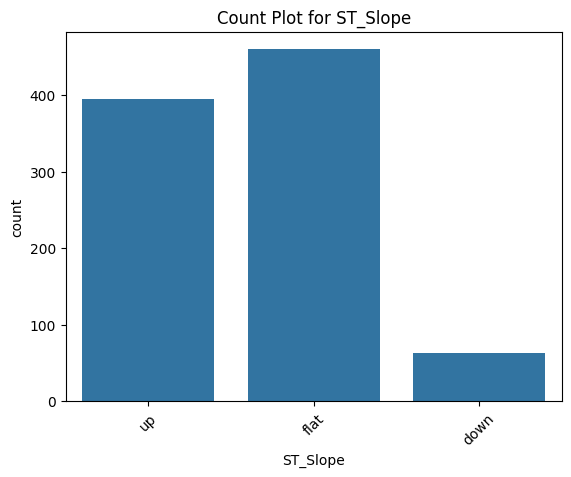

In [18]:

# Count plot for target
sns.countplot(x='HeartDisease', data=df)
plt.title("Target Class Distribution")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Boxplot for outlier detection
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# Countplot for categorical features (if any)
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    plt.figure()
    sns.countplot(x=col, data=df)
    plt.xticks(rotation=45)
    plt.title(f"Count Plot for {col}")
    plt.show()


Preprocessing

In [19]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


Train test split


In [20]:
from sklearn.model_selection import train_test_split

X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\n✅ Data ready for modeling!")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


✅ Data ready for modeling!
X_train shape: (734, 11)
X_test shape: (184, 11)


Training

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("\n📘 Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# 2. Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("\n🌳 Decision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# 3. Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\n🌲 Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# 4. Support Vector Machine
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("\n📈 SVM")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


📘 Logistic Regression
Accuracy: 0.875
              precision    recall  f1-score   support

           0       0.90      0.80      0.85        82
           1       0.86      0.93      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184


🌳 Decision Tree
Accuracy: 0.7880434782608695
              precision    recall  f1-score   support

           0       0.76      0.77      0.76        82
           1       0.81      0.80      0.81       102

    accuracy                           0.79       184
   macro avg       0.79      0.79      0.79       184
weighted avg       0.79      0.79      0.79       184


🌲 Random Forest
Accuracy: 0.875
              precision    recall  f1-score   support

           0       0.87      0.84      0.86        82
           1       0.88      0.90      0.89       102

    accuracy                           0.88       184
   macro a

Ensemble Voting


🗳️ Hard Voting Classifier
Accuracy: 0.8804347826086957
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        82
           1       0.91      0.87      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184


🧠 Soft Voting Classifier
Accuracy: 0.8586956521739131
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        82
           1       0.87      0.87      0.87       102

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



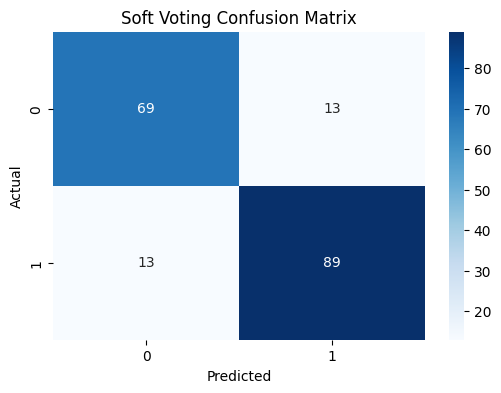

In [22]:

# Hard Voting (based on majority vote)
voting_hard = VotingClassifier(
    estimators=[('lr', lr), ('dt', dt), ('rf', rf), ('svm', svm)],
    voting='hard'
)
selected_features = X.columns.tolist()
joblib.dump(selected_features, 'feature_list.pkl')
voting_hard.fit(X_train, y_train)
y_pred_hard = voting_hard.predict(X_test)
print("\n🗳️ Hard Voting Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_hard))
print(classification_report(y_test, y_pred_hard))

# Soft Voting (based on predicted probabilities)
voting_soft = VotingClassifier(
    estimators=[('lr', lr), ('dt', dt), ('rf', rf), ('svm', svm)],
    voting='soft'
)
voting_soft.fit(X_train, y_train)
y_pred_soft = voting_soft.predict(X_test)
print("\n🧠 Soft Voting Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_soft))
print(classification_report(y_test, y_pred_soft))

# ------------------ Confusion Matrix ------------------

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_soft), annot=True, fmt="d", cmap="Blues")
plt.title("Soft Voting Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [23]:

joblib.dump(voting_hard, 'heart_disease_model.pkl')


['heart_disease_model.pkl']

In [24]:
# Load model and features
model = joblib.load('heart_disease_model.pkl')
feature_list = joblib.load('feature_list.pkl')

# Sample input
input_dict = {
    'Age': 52, 'Sex': 1, 'ChestPainType': 0, 'RestingBP': 125,
    'Cholesterol': 212, 'FastingBS': 0, 'RestingECG': 1, 'MaxHR': 168,
    'ExerciseAngina': 0, 'Oldpeak': 1.0, 'ST_Slope': 2
}

# If model used 11 features, make sure sample has only those:
input_df = pd.DataFrame([input_dict])[feature_list]

# Predict
prediction = model.predict(input_df)
print("Predicted:", prediction[0])


Predicted: 0


In [27]:
print("Expected input features:", voting_hard.n_features_in_)


Expected input features: 11


In [28]:
def predict_heart_disease(model_path, feature_list_path, input_dict):
    import pandas as pd
    import joblib

    model = joblib.load(model_path)
    feature_list = joblib.load(feature_list_path)

    print("Loaded feature list:", feature_list)
    print("Input dictionary keys:", input_dict.keys())

    input_df = pd.DataFrame([input_dict])[feature_list]
    print("Prepared input_df:\n", input_df)

    prediction = model.predict(input_df)[0]
    return prediction


In [29]:
sample_input = {
    'Age': 49,
    'Sex': 0,
    'ChestPainType': 2,   # NAP
    'RestingBP': 160,
    'Cholesterol': 180,
    'FastingBS': 0,
    'RestingECG': 0,
    'MaxHR': 156,
    'ExerciseAngina': 0,
    'Oldpeak': 1.0,
    'ST_Slope': 1
}

result = predict_heart_disease("heart_disease_model.pkl", "feature_list.pkl", sample_input)
print("Predicted:", "Heart Disease" if result == 1 else "No Heart Disease")


Loaded feature list: ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']
Input dictionary keys: dict_keys(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'])
Prepared input_df:
    Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   49    0              2        160          180          0           0   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  
0    156               0      1.0         1  
Predicted: No Heart Disease


In [30]:
print("Input DataFrame:")
print(input_df)


Input DataFrame:
   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   52    1              0        125          212          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  
0    168               0      1.0         2  


In [32]:
# Load original dataset
df = pd.read_csv(r"D:\Real ML\Level 3\Heart Disease\heart.csv")

# Filter for similar rows
filtered = df[
    (df['Age'] == 49) &
    (df['Sex'] == 0) &
    (df['ChestPainType'] == 2) &
    (df['RestingBP'] == 160) &
    (df['Cholesterol'] == 180) &
    (df['FastingBS'] == 0) &
    (df['RestingECG'] == 0) &
    (df['MaxHR'] == 156) &
    (df['ExerciseAngina'] == 0) &
    (df['Oldpeak'] == 1.0) &
    (df['ST_Slope'] == 1)
]

print(filtered[['Age', 'Sex', 'ChestPainType', 'HeartDisease']])


Empty DataFrame
Columns: [Age, Sex, ChestPainType, HeartDisease]
Index: []


In [39]:
# Try increasing Oldpeak to 2.5
sample_input['ExerciseAngina'] = 1
sample_input['ST_Slope']=1
result = predict_heart_disease("heart_disease_model.pkl", "feature_list.pkl", sample_input)
print("Predicted:", "Heart Disease" if result == 1 else "No Heart Disease")



Loaded feature list: ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']
Input dictionary keys: dict_keys(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'])
Prepared input_df:
    Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   49    0              2        160          180          0           0   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  
0    156               1        1         1  
Predicted: No Heart Disease


In [ ]:
import random
import pandas as pd
import joblib

# Load model and feature list
model = joblib.load("heart_disease_model.pkl")
features = joblib.load("feature_list.pkl")

def generate_random_input():
    return {
        'Age': random.randint(29, 77),
        'Sex': random.choice([0, 1]),
        'ChestPainType': random.choice([0, 1, 2, 3]),
        'RestingBP': random.randint(80, 200),
        'Cholesterol': random.randint(100, 600),
        'FastingBS': random.choice([0, 1]),
        'RestingECG': random.choice([0, 1, 2]),
        'MaxHR': random.randint(60, 202),
        'ExerciseAngina': random.choice([0, 1]),
        'Oldpeak': round(random.uniform(0.0, 6.0), 1),
        'ST_Slope': random.choice([0, 1, 2])
    }

# Predict function
def predict(input_dict):
    input_df = pd.DataFrame([input_dict])[features]
    prediction = model.predict(input_df)[0]
    return prediction

# Run loop
for i in range(1, 101):
    sample = generate_random_input()
    result = predict(sample)
    print(f"Sample {i}: {sample}")
    print("Prediction:", "Heart Disease" if result == 1 else "No Heart Disease")
    print("-" * 50)


Real World Scenario Example


In [44]:
sample_real_patient = {
    'Age': 45,
    'Sex': 1,
    'ChestPainType': 3,        # ASY
    'RestingBP': 150,
    'Cholesterol': 220,
    'FastingBS': 1,            # Diabetic
    'RestingECG': 2,           # LVH
    'MaxHR': 110,
    'ExerciseAngina': 1,
    'Oldpeak': 2.5,
    'ST_Slope': 1              # Flat
}

import pandas as pd
import joblib

model = joblib.load("heart_disease_model.pkl")
features = joblib.load("feature_list.pkl")

df = pd.DataFrame([sample_real_patient])[features]
prediction = model.predict(df)[0]

print("Prediction:", "Heart Disease" if prediction == 1 else "No Heart Disease")


Prediction: Heart Disease
